# Exploratory CSCW Gig
Having a look at some of the data from the independent condition in the CSCW paper.
This notebook loads the files generated from the log files, reports percentages, etc.

## States Considered
* **Query counts** are approximated by the first hit on a `QUERYSUGGESTIONS_GET` occurrence. 

## Data
* `full_session` considered the entire search session, over all groups (individuals), over each topic.

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

%matplotlib inline

In [35]:
path_full_session = 'data/fullsession.csv'
path_five_session = 'data/first5minutes.csv'
path_second_five_session = 'data/second5minutes.csv'

saved_0_doc_session = 'data/saved0.csv'
saved_1_doc_session = 'data/saved1.csv'
saved_2_doc_session = 'data/saved2.csv'
saved_3_doc_session = 'data/saved3.csv'
saved_4_doc_session = 'data/saved4.csv'
saved_5_doc_session = 'data/saved5.csv'
saved_6_doc_session = 'data/saved6.csv'
saved_7_doc_session = 'data/saved7.csv'

queries_0_doc_session = 'data/query0.csv'
queries_1_doc_session = 'data/query1.csv'
queries_2_doc_session = 'data/query2.csv'
queries_3_doc_session = 'data/query3.csv'
queries_4_doc_session = 'data/query4.csv'
queries_5_doc_session = 'data/query5.csv'
queries_6_doc_session = 'data/query6.csv'
queries_7_doc_session = 'data/query7.csv'

In [36]:
full_df = pd.read_csv(path_full_session)
first5_df = pd.read_csv(path_five_session)
second5_df = pd.read_csv(path_second_five_session)

saved0_df = pd.read_csv(saved_0_doc_session)
saved1_df = pd.read_csv(saved_1_doc_session)
saved2_df = pd.read_csv(saved_2_doc_session)
saved3_df = pd.read_csv(saved_3_doc_session)
saved4_df = pd.read_csv(saved_4_doc_session)
saved5_df = pd.read_csv(saved_5_doc_session)
saved6_df = pd.read_csv(saved_6_doc_session)
saved7_df = pd.read_csv(saved_7_doc_session)

query0_df = pd.read_csv(queries_0_doc_session)
query1_df = pd.read_csv(queries_1_doc_session)
query2_df = pd.read_csv(queries_2_doc_session)
query3_df = pd.read_csv(queries_3_doc_session)
query4_df = pd.read_csv(queries_4_doc_session)
query5_df = pd.read_csv(queries_5_doc_session)
query6_df = pd.read_csv(queries_6_doc_session)
query7_df = pd.read_csv(queries_7_doc_session)

## Compute Individual Session Hover Percentages
We take each search session recorded individually, and work out the percentage of interactions on the different interface components.

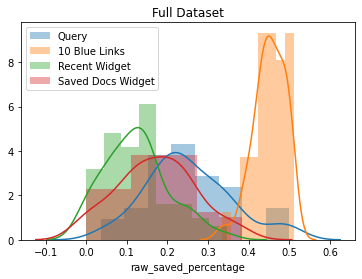

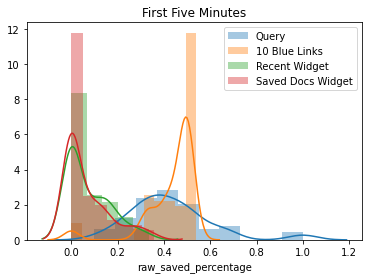

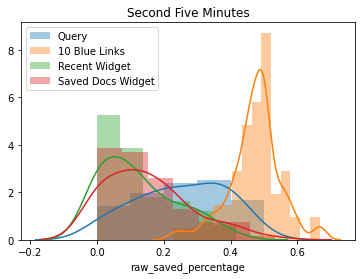

In [31]:
def compute_session_percentages(df, name):
    """
    Computes per-session interaction percentages, adding columns to the given DataFrame.
    """
    df['raw_total'] = df['raw_query'] + df['raw_results'] + df['raw_recent'] + df['raw_saved']
    df['raw_query_percentage'] = df['raw_query'] / df['raw_total']
    df['raw_results_percentage'] = df['raw_results'] / df['raw_total']
    df['raw_recent_percentage'] = df['raw_recent'] / df['raw_total']
    df['raw_saved_percentage'] = df['raw_saved'] / df['raw_total']
    
    sns.distplot(df['raw_query_percentage'], label='Query')
    sns.distplot(df['raw_results_percentage'], label='10 Blue Links')
    sns.distplot(df['raw_recent_percentage'], label='Recent Widget')
    sns.distplot(df['raw_saved_percentage'], label='Saved Docs Widget')
    
    plt.title(name)
    plt.legend()
    plt.show()
    
compute_session_percentages(full_df, 'Full Dataset')
compute_session_percentages(first5_df, 'First Five Minutes')
compute_session_percentages(second5_df, 'Second Five Minutes')

## Compute Raw Hover Percentages
Computing this value by summing over all observations, then dividing by the total sum.

In [37]:
def compute_raw_percentages(totals_df, df, name):
    """
    Adds the percentage columns to the given DataFrame for raw hover counts.
    """
    df['raw_sum'] = df['raw_query'] + df['raw_results'] + df['raw_recent'] + df['raw_saved']
    
    totals_df = totals_df.append({'name': name,
                                  'raw_sum': df['raw_sum'].sum(),
                                  'raw_query_sum': df['raw_query'].sum(),
                                  'raw_results_sum': df['raw_results'].sum(),
                                  'raw_recent_sum': df['raw_recent'].sum(),
                                  'raw_saved_sum': df['raw_saved'].sum(),
                                  
                                  'raw_query_percentage': df['raw_query'].sum() / df['raw_sum'].sum(),
                                  'raw_results_percentage': df['raw_results'].sum() / df['raw_sum'].sum(),
                                  'raw_recent_percentage': df['raw_recent'].sum() / df['raw_sum'].sum(),
                                  'raw_saved_percentage': df['raw_saved'].sum() / df['raw_sum'].sum(),
                                 },
                                 ignore_index=True)
    
    return totals_df
    
totals_df = pd.DataFrame(columns=['name', 'raw_sum', 'raw_query_sum', 'raw_results_sum', 'raw_recent_sum', 'raw_saved_sum', 'raw_query_percentage', 'raw_results_percentage', 'raw_recent_percentage', 'raw_saved_percentage'])

# For each dataset, work out the percentages by calling compute_raw_percentages()
totals_df = compute_raw_percentages(totals_df, full_df, 'full')
totals_df = compute_raw_percentages(totals_df, first5_df, 'first5')
totals_df = compute_raw_percentages(totals_df, second5_df, 'second5')

totals_df = compute_raw_percentages(totals_df, saved0_df, 'saved0')
totals_df = compute_raw_percentages(totals_df, saved1_df, 'saved1')
totals_df = compute_raw_percentages(totals_df, saved2_df, 'saved2')
totals_df = compute_raw_percentages(totals_df, saved3_df, 'saved3')
totals_df = compute_raw_percentages(totals_df, saved4_df, 'saved4')
totals_df = compute_raw_percentages(totals_df, saved5_df, 'saved5')
totals_df = compute_raw_percentages(totals_df, saved6_df, 'saved6')
totals_df = compute_raw_percentages(totals_df, saved7_df, 'saved7')

totals_df = compute_raw_percentages(totals_df, query0_df, 'queries0')
totals_df = compute_raw_percentages(totals_df, query1_df, 'queries1')
totals_df = compute_raw_percentages(totals_df, query2_df, 'queries2')
totals_df = compute_raw_percentages(totals_df, query3_df, 'queries3')
totals_df = compute_raw_percentages(totals_df, query4_df, 'queries4')
totals_df = compute_raw_percentages(totals_df, query5_df, 'queries5')
totals_df = compute_raw_percentages(totals_df, query6_df, 'queries6')
totals_df = compute_raw_percentages(totals_df, query7_df, 'queries7')


In [39]:
# Drop the raw values, show only the percentages.
percentages_df = totals_df.drop(columns=['raw_query_sum', 'raw_results_sum', 'raw_recent_sum', 'raw_saved_sum'])
percentages_df

,name,raw_sum,raw_query_percentage,raw_results_percentage,raw_recent_percentage,raw_saved_percentage
0,full,3333,0.247225,0.448845,0.125713,0.178218
1,first5,654,0.366972,0.460245,0.084098,0.088685
2,second5,1246,0.244783,0.453451,0.142857,0.158909
3,saved0,425,0.416471,0.463529,0.112941,0.007059
4,saved1,314,0.219745,0.554140,0.159236,0.066879
5,saved2,369,0.170732,0.558266,0.151762,0.119241
6,saved3,301,0.172757,0.591362,0.129568,0.106312
7,saved4,347,0.201729,0.550432,0.103746,0.144092
8,saved5,273,0.172161,0.589744,0.098901,0.139194
9,saved6,292,0.208904,0.551370,0.071918,0.167808


## Plotting the Percentage of Interactions as Widget Content Increases
So, given the raw data above, what do the percentages tell us as the number of items in the two widgets we are looking at?

In [75]:
def plot_interactions_as_widget_increases(raw_data, title, xlabel, ylabel):
    df = pd.DataFrame(columns=['name', 'raw_sum', 'raw_query_sum', 'raw_results_sum', 'raw_recent_sum', 'raw_saved_sum', 'raw_query_percentage', 'raw_results_percentage', 'raw_recent_percentage', 'raw_saved_percentage'])
    df = compute_raw_percentages(df, raw_data[0], 0)
    df = compute_raw_percentages(df, raw_data[1], 1)
    df = compute_raw_percentages(df, raw_data[2], 2)
    df = compute_raw_percentages(df, raw_data[3], 3)
    df = compute_raw_percentages(df, raw_data[4], 4)
    df = compute_raw_percentages(df, raw_data[5], 5)
    df = compute_raw_percentages(df, raw_data[6], 6)
    df = compute_raw_percentages(df, raw_data[7], 7)

    sns.lineplot(df['name'], df['raw_recent_percentage'], label="Recent queries interactions")
    sns.lineplot(df['name'], df['raw_saved_percentage'], label="Previous saved documents interactions")
    sns.lineplot(df['name'], df['raw_query_percentage'], label="Query box interactions (approx.)")
    sns.lineplot(df['name'], df['raw_results_percentage'], label="Results (10 blue links) interactions")

    plt.title(title)
    plt.legend()
    plt.ylabel(xlabel)
    plt.ylim([0, 0.75])
    plt.xlabel(ylabel)
    
    df.head()

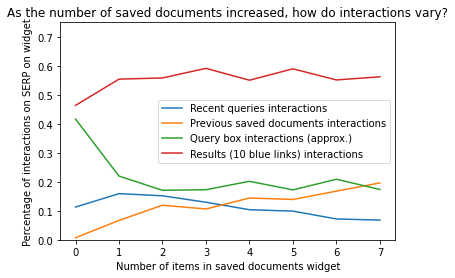

In [76]:
saved_data = [
    saved0_df,
    saved1_df,
    saved2_df,
    saved3_df,
    saved4_df,
    saved5_df,
    saved6_df,
    saved7_df,
]

plot_interactions_as_widget_increases(saved_data,
                                      'As the number of saved documents increased, how do interactions vary?',
                                      'Percentage of interactions on SERP on widget',
                                      'Number of items in saved documents widget')

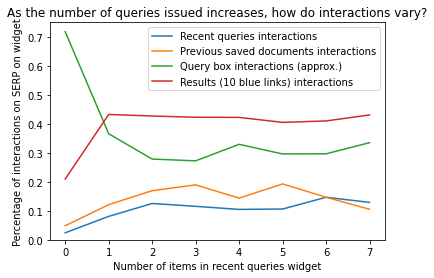

In [77]:
query_data = [
    query0_df,
    query1_df,
    query2_df,
    query3_df,
    query4_df,
    query5_df,
    query6_df,
    query7_df,
]

plot_interactions_as_widget_increases(query_data,
                                      'As the number of queries issued increases, how do interactions vary?',
                                      'Percentage of interactions on SERP on widget',
                                      'Number of items in recent queries widget')

## Why is this Happening?
* The queries box is placed on the top.
* Both widgets are fixed height, and scrollbars are present when content does not fit entirely within a widget.
* What is the usefulness of both widgets to an independent searcher?
* ?